In [1]:
import numpy as np   
import pandas as pd    
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import os
%matplotlib inline

In [2]:
path = os.path.abspath(os.path.join(os.path.dirname('EDA.ipynb'), '..', 'Parsing\\dataframes'))

In [3]:
df = pd.read_csv(path +'\\merged_df.csv')
df = df[df['Qty'] > 0]

C:\Users\iavoytenok\AppData\Local\Temp\ipykernel_14816\1676691243.py:1: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path +'\\merged_df.csv')


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169854 entries, 0 to 576809
Data columns (total 81 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Language                169854 non-null  object 
 1   Set                     169854 non-null  object 
 2   Foil                    169854 non-null  int64  
 3   Quality                 169854 non-null  object 
 4   Rarity                  169854 non-null  object 
 5   Price                   169854 non-null  int64  
 6   Qty                     169854 non-null  int64  
 7   Name                    169854 non-null  object 
 8   Type                    169854 non-null  object 
 9   Illustrator             168161 non-null  object 
 10  Standard                169854 non-null  object 
 11  Alchemy                 169854 non-null  object 
 12  Pioneer                 169854 non-null  object 
 13  Explorer                169854 non-null  object 
 14  Modern              

In [5]:
# Смотрим распределение для небинарных фич
nonbin_col = []
for col in df.columns.tolist():
    if df[col].nunique() > 2:
        nonbin_col.append(col)

In [6]:
df[nonbin_col].describe()

,Price,Qty,Cost_qty,Feature length,Month,Year,Month_cos,Features cost,Color cost,Total abilities qty,Abilities only qty,Action only qty
count,169854.000000,169854.000000,169854.000000,169854.000000,169854.000000,169854.000000,1.698540e+05,169854.000000,169854.000000,169854.000000,169854.000000,169854.000000
mean,77.407909,4.190475,1.370436,60.769408,7.027918,2014.084885,-1.119558e-01,1.545239,1.707060,0.458040,0.144583,0.313328
std,300.162081,5.206543,1.921576,73.192179,2.930212,6.078722,6.648884e-01,1.491977,2.801975,0.929635,0.450811,0.716923
min,7.000000,1.000000,0.000000,0.000000,1.000000,1994.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,0.000000,15.000000,5.000000,2010.000000,-8.660254e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2.000000,0.000000,15.000000,7.000000,2016.000000,-1.836970e-16,2.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,5.000000,3.000000,93.000000,10.000000,2019.000000,5.000000e-01,2.000000,3.000000,1.000000,0.000000,0.000000
max,33020.000000,72.000000,15.000000,645.000000,12.000000,2022.000000,1.000000e+00,102.000000,25.000000,14.000000,13.000000,6.000000


Text(0.5, 1.0, 'Распределение цены')

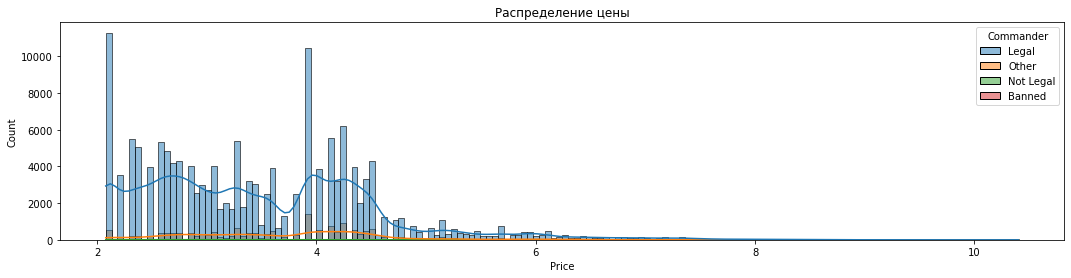

In [7]:
plt.figure(figsize=(18, 4))
sns.histplot(df, x = np.log1p(df['Price']), kde = True, hue = 'Commander')
plt.title('Распределение цены')

Большие хвосты, надо подрезать выбросы

In [8]:
len(df)

169854

In [9]:
# Подбираем порог адекватной цены, стараемся выкинуть поменьше строк
print(round(len(df[(df['Price'] < 5) | (df['Price'] > 1000)]) / len(df), 3))
df = df[(df['Price'] > 5) & (df['Price'] < 1001)]

0.01


In [10]:
std_skew = skew(df['Price'])
log_skew = skew(np.log1p(df['Price']))
boxcox_skew = skew(stats.boxcox(df['Price'])[0])
print(std_skew, log_skew, boxcox_skew)

5.103615031053878 0.6107826425677428 0.05579562855425321


In [11]:
df['Price'], lmbda = stats.boxcox(df['Price'])

Text(0.5, 1.0, 'Количество лотов по типу карты')

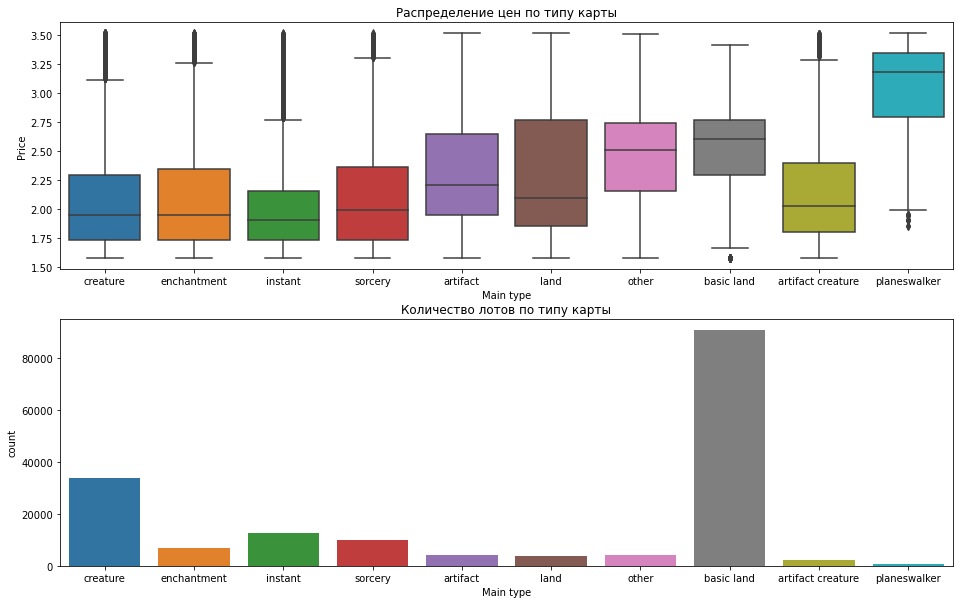

In [12]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 10))
sns.boxplot(x = df['Main type'], y = df['Price'], ax = ax1)
ax1.set_title('Распределение цен по типу карты')
sns.countplot(x = df['Main type'], ax = ax2)
ax2.set_title('Количество лотов по типу карты')

При том, что basic land занимают более половины всех лотов, у них нет никаких критериев функциональности. Только состояние и визуальная составляющая. Таблицу необходимо разделить.

Skewness: 0.05579562855425321 
Kurtosis: -0.7911588495326622


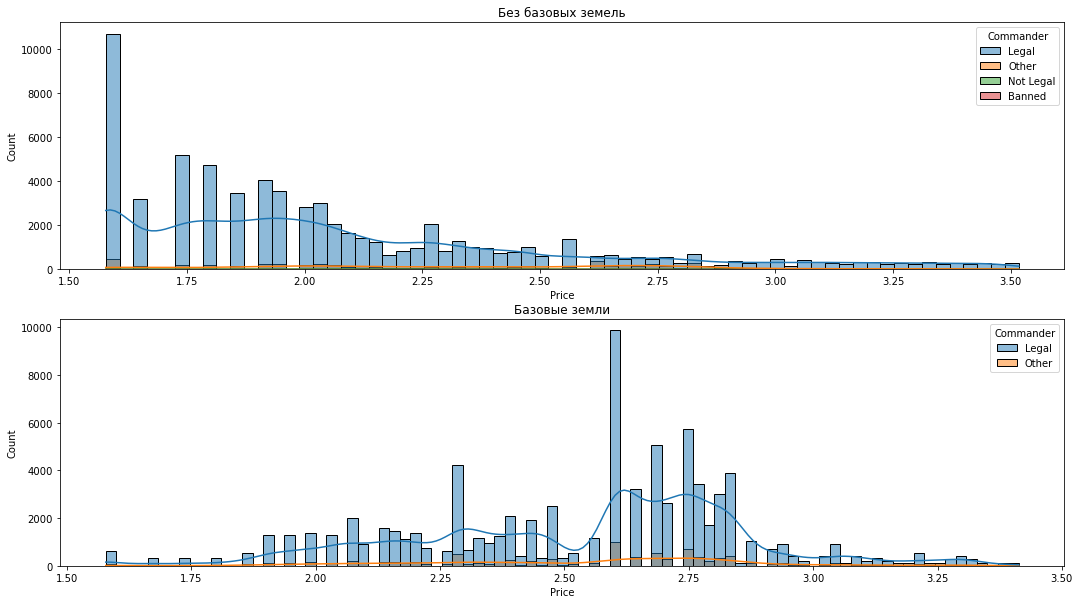

In [13]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18, 10))
bcskew = skew(df['Price'])
bckurtosis = kurtosis(df['Price'])
sns.histplot(data = df[(df['Main type'] != 'basic land') ], x = 'Price', kde = 'True', hue = 'Commander', ax = ax1) 
ax1.set_title('Без базовых земель')
sns.histplot(data = df[(df['Main type'] == 'basic land') ], x = 'Price', kde = 'True', hue = 'Commander', ax = ax2)
ax2.set_title('Базовые земли')
print(f'Skewness: {bcskew} \nKurtosis: {bckurtosis}')

basic lands похожи на нормальное распределение, в то время, как другая часть данных похожа на геометрическое

Text(0.5, 1.0, 'Распределение цены от состояния и редкости')

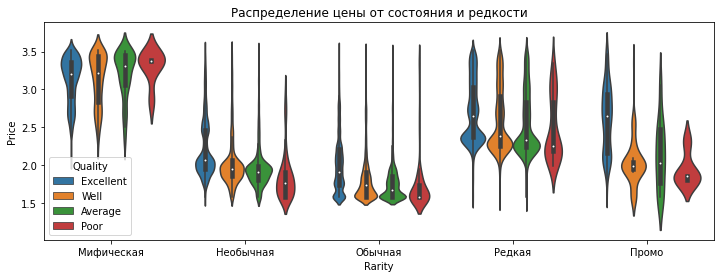

In [14]:
plt.figure(figsize=(12,4))
sns.violinplot(x='Rarity', y='Price', data=df[df['Main type'] != 'basic land'], hue = 'Quality')
plt.title('Распределение цены от состояния и редкости')

Выше редкость - дороже карта. Выше качество - дороже карта (кроме мифических)

In [15]:
print('Распределение карт по редкости\n',
      df['Rarity'].value_counts(normalize=True).reset_index(), 
      '\nРаспределение карт по редкости без земель\n',
      df[df['Main type'] != 'basic land']['Rarity'].value_counts(normalize=True).reset_index())

Распределение карт по редкости
         index    Rarity
0     Обычная  0.780884
1   Необычная  0.137401
2      Редкая  0.068938
3  Мифическая  0.009416
4       Промо  0.003361 
Распределение карт по редкости без земель
         index    Rarity
0     Обычная  0.528501
1   Необычная  0.297504
2      Редкая  0.149267
3  Мифическая  0.020387
4       Промо  0.004340


Земли вносят шум только в обычные карты, но их большинство

<Figure size 1296x576 with 0 Axes>

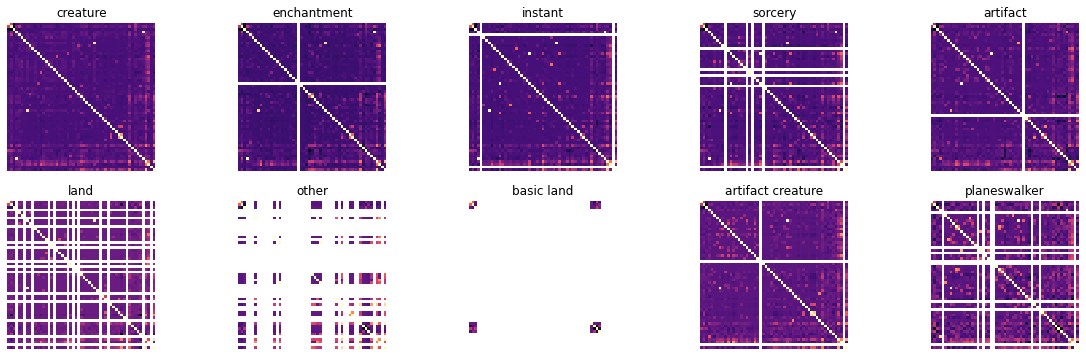

In [16]:
plt.figure(figsize=(18,8))
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))
ax_1 = 0
ax_x = 0
ax_y = 0
for m_type in df['Main type'].unique():
    sns.heatmap(df[df['Main type'] == m_type].corr(), cmap = 'magma', square=True, ax =ax[(ax_x,ax_y)], cbar = False, xticklabels=False, yticklabels=False)
    ax[(ax_x,ax_y)].set_title(m_type)
    ax_1 += 1
    ax_x = ax_1 // 5
    ax_y = ax_1 % 5

Помимо basic land и other, типы имеют схожую корреляционную матрицу, поэтому их можно рассматривать вместе

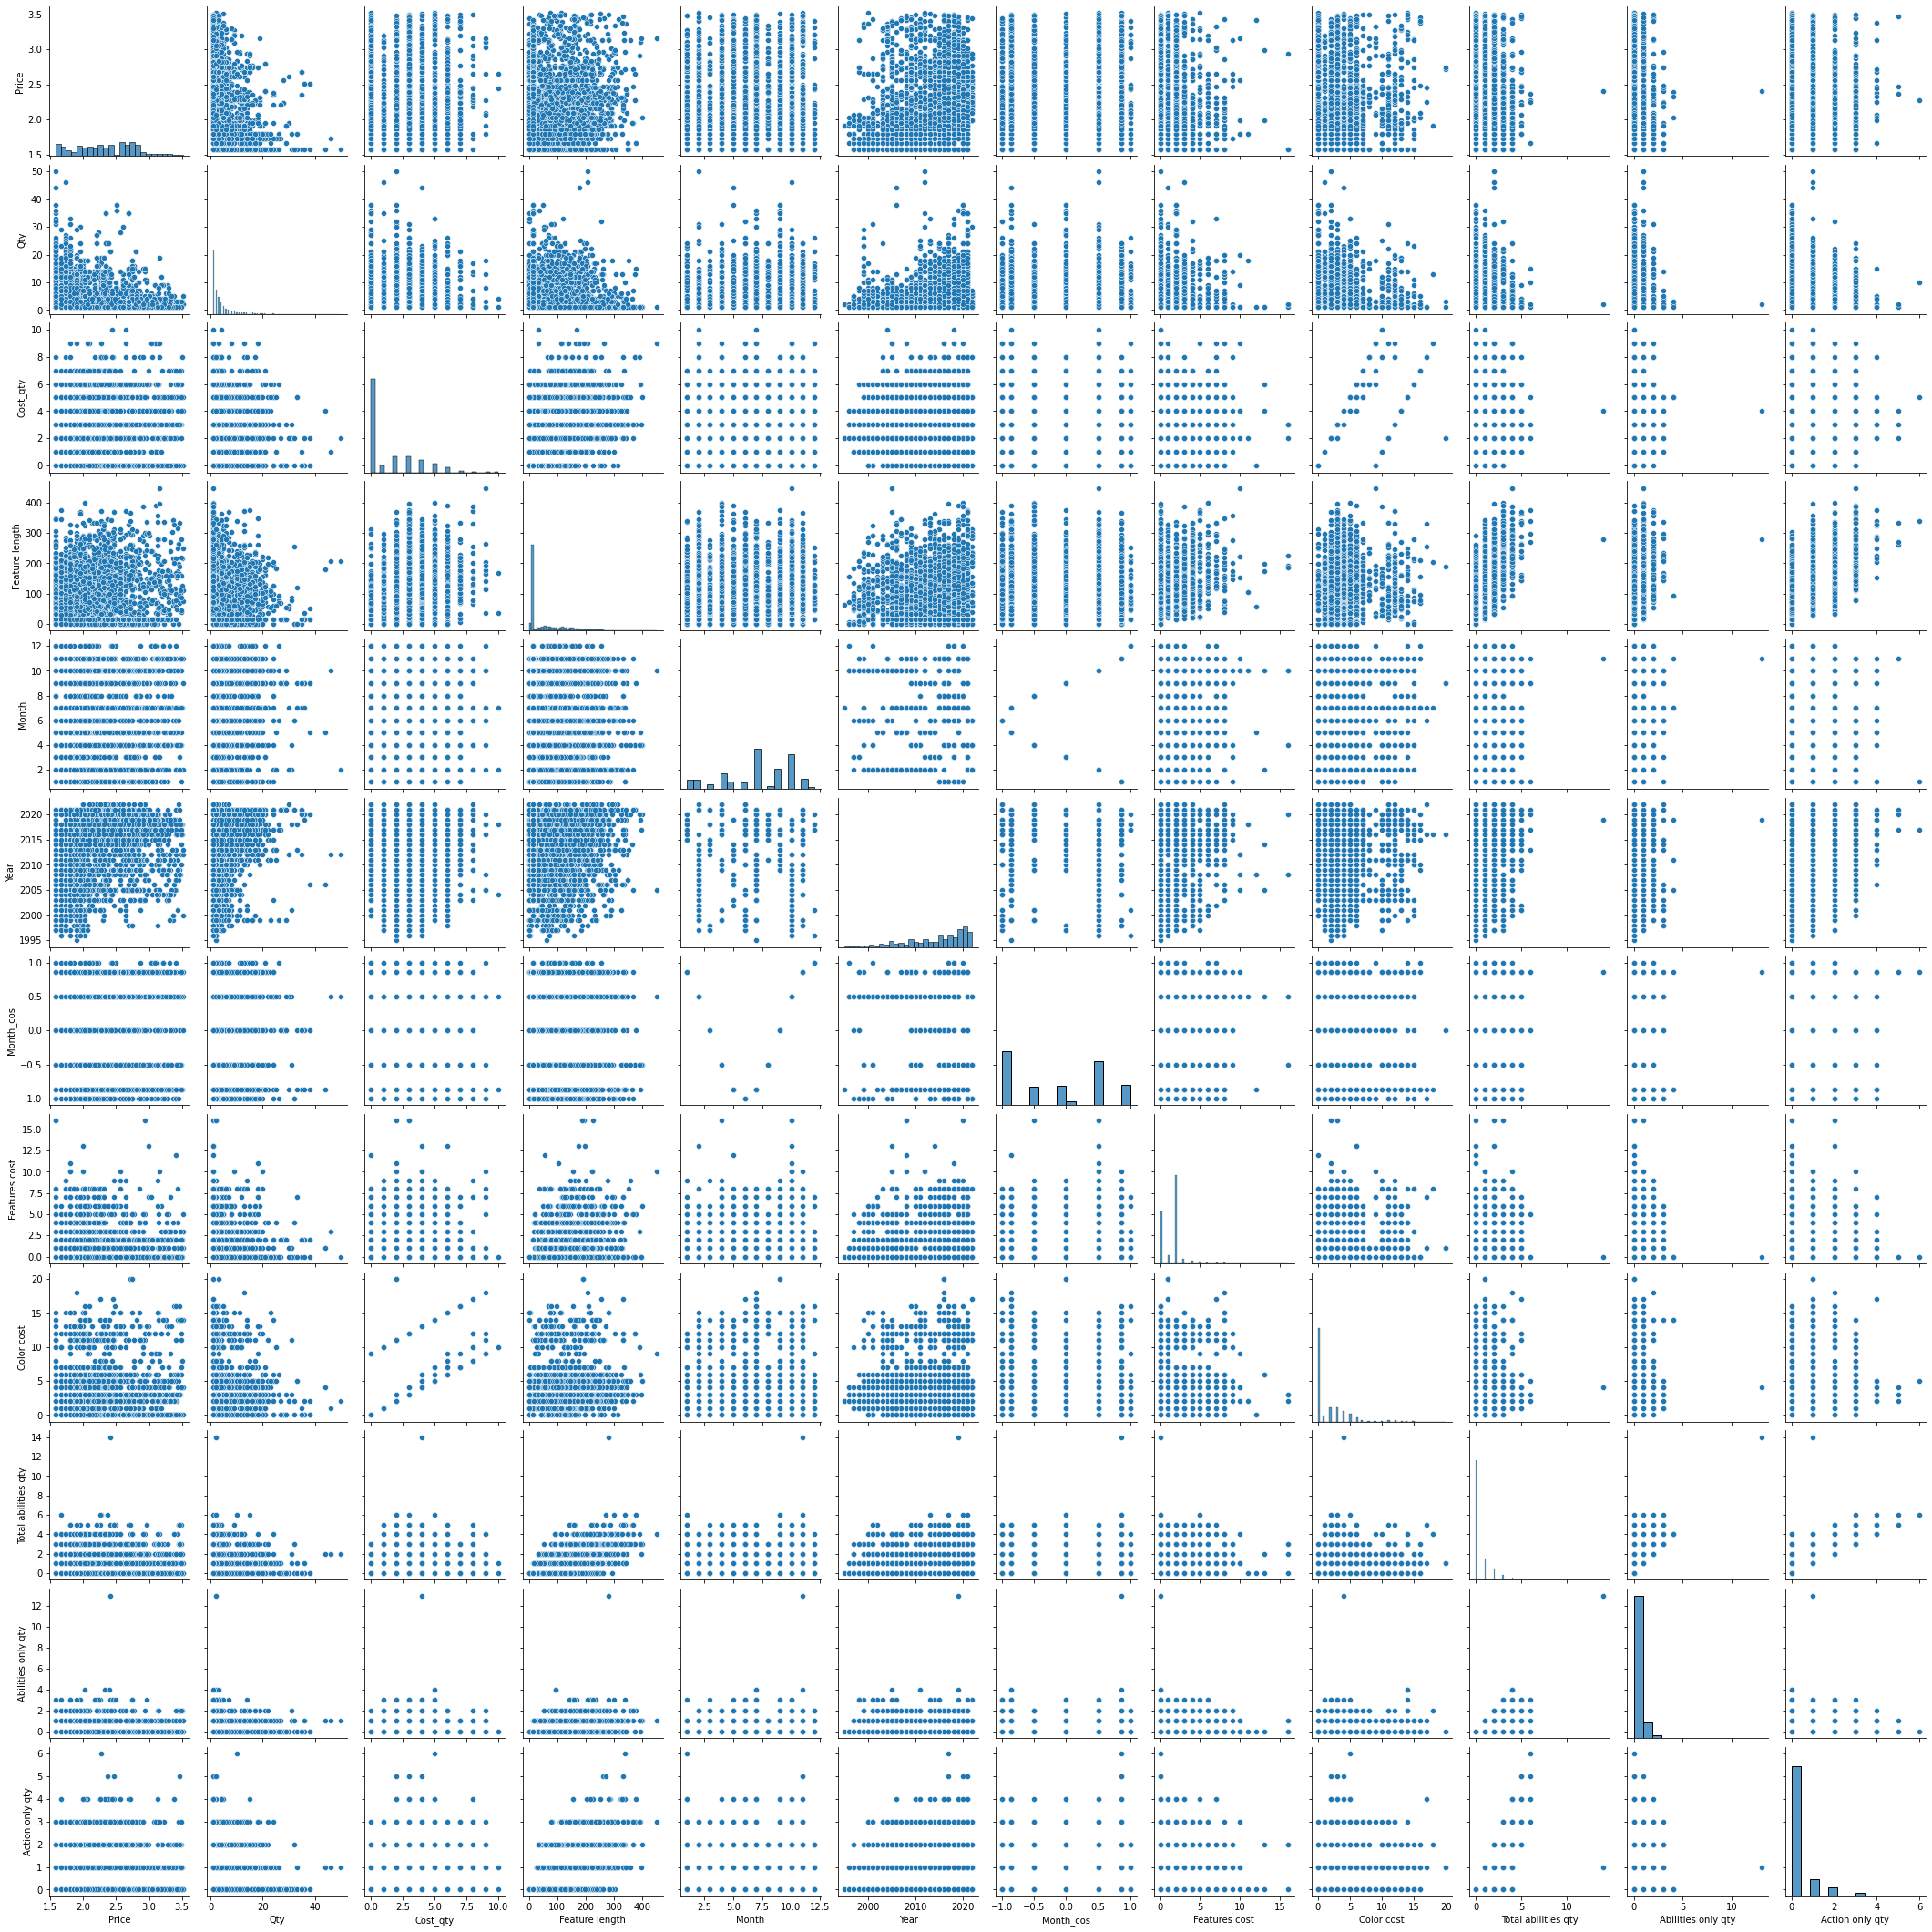

In [17]:
# Долго вычисляется, приходится смотреть по выборке
sns.pairplot(df[nonbin_col].sample(5000))

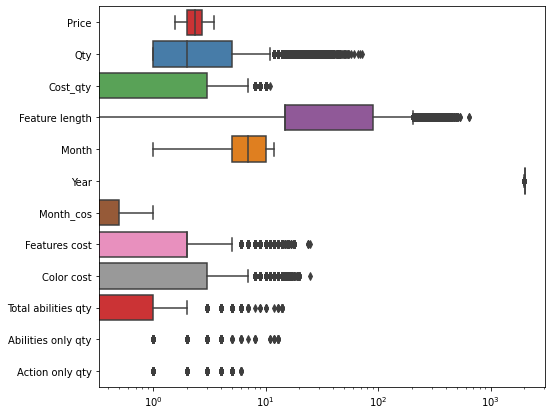

In [18]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[nonbin_col], orient="h", palette="Set1")

# Feature engineering

In [19]:
# Находим общее кол-во карт в продаже по имени
total_qty_dict = df.groupby('Name').sum()['Qty'].to_dict()
df['Qty total'] = df['Name'].map(total_qty_dict)
# nonbin_col.append('Qty_total')

Пустые значения

In [20]:
df[df['Name'] == 'Vanquish the Weak']

,Language,Set,Foil,Quality,Rarity,Price,Qty,Name,Type,Illustrator,...,Month_cos,Colors_features,Features cost,Colors_dist,Color cost,Total abilities qty,Abilities only qty,Ability words only qty,Action only qty,Qty total
7382,Русский,Ixalan,0,Excellent,Обычная,1.735872,28,Vanquish the Weak,Instant,Bayard Wu,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
7383,Русский,Ixalan,0,Excellent,Обычная,1.735872,28,Vanquish the Weak,Instant,David Palumbo,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
7384,Русский,Ixalan,1,Excellent,Обычная,2.253617,3,Vanquish the Weak,Instant,Bayard Wu,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
7385,Русский,Ixalan,1,Excellent,Обычная,2.253617,3,Vanquish the Weak,Instant,David Palumbo,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
288961,Английский,Zendikar Rising,1,Excellent,Обычная,2.031170,11,Vanquish the Weak,Instant,Bayard Wu,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
288962,Английский,Zendikar Rising,1,Excellent,Обычная,2.031170,11,Vanquish the Weak,Instant,David Palumbo,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
288963,Русский,Zendikar Rising,0,Excellent,Обычная,1.577731,20,Vanquish the Weak,Instant,Bayard Wu,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124
288964,Русский,Zendikar Rising,0,Excellent,Обычная,1.577731,20,Vanquish the Weak,Instant,David Palumbo,...,-1.836970e-16,NaN,0,B,3,0,0,0,0,124


In [21]:
df[(df['Qty total'] < 100) & (df['Qty total'] > 1)]['Name'].value_counts()

Putrefy                     50
Opt                         49
Coercion                    44
Sunpetal Grove              42
Pyroclasm                   42
                            ..
Kadena's Silencer            1
Grismold, the Dreadsower     1
Greven, Predator Captain     1
Gift of Doom                 1
Laid to Rest                 1
Name: Name, Length: 14417, dtype: int64

In [22]:
missed = {}
for col in df.columns:
    if df[col].isnull().any():
        missed.update({col: [round(df[col].isnull().sum()/len(df)*100,2), df[col].dtype]})
sorted(missed.items(), key = lambda x: x[1], reverse=True)

[('Main feature', [79.83, dtype('O')]),
 ('Colors_features', [33.64, dtype('O')]),
 ('Illustrator', [1.0, dtype('O')])]

In [23]:
for cols in missed.keys():
    df[cols].fillna('None', inplace = True)

Генерируем признаки

In [24]:
def create_aggregations(col:str, num:int) -> pd.Series:
    '''
    Укрупняем числовые данные по медианам
    '''
    p_0 = np.percentile(df[col],0)
    p_n = np.percentile(df[col],num)
    print(col, p_0, p_n)
    mark = df[col].apply(lambda x: 'Minimal' if x == p_0 else ('Lower' if x <= p_n else 'Higher'))
    return mark

In [29]:
set_cards_dict = df.groupby(['Set']).nunique()['Name'].to_dict()
df['Set cards total'] = df['Name'].map(set_cards_dict)

In [25]:
df['Qty total agg'] = create_aggregations('Qty total',25)
df['Cost qty agg'] = create_aggregations('Cost_qty',75)
df['Feature length agg'] = create_aggregations('Feature length',50)
df['Total abilities qty agg'] = create_aggregations('Total abilities qty',90)
df['Abilities only qty agg'] = create_aggregations('Abilities only qty',90)
df['Action only qty agg'] = create_aggregations('Action only qty',90)

Qty total 1.0 34.0
Cost_qty 0.0 3.0
Feature length 0.0 15.0
Total abilities qty 0.0 2.0
Abilities only qty 0.0 1.0
Action only qty 0.0 1.0
